In [ ]:
#CS 412 - Intro to ML
#Homework Assignment 5
#Task 2 - Smoking type classification

<center>
    <b>CS 412 - Introduction to Machine Learning</b>
    <br>
    Homework Assignment 5
    <br>
    Task 2 - Smoking type classification
</center>

In [226]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

import sys

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

<ul>
    <li>The first step is to import the data from the input file.</li>
    <li>The shape of the dataset is printed for a higher level view.</li>
    <li>Additionally, the target column is set as "Smoking" manually.</li>
</ul>

In [227]:
#Step 1 - Import data

data = pd.read_csv("responses.csv")
data_orig = data.copy()

print(data.shape)

#Target column = Smoking
target_col = "Smoking"

(1010, 150)


A higher level view of the data can be obtained. It can be seen that there are columns containing missing entries.

In [228]:
data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


<ul>
    <li>It can be seen that the dataset contains both numerical and categorical columns.</li>
    <li>The list of numerical and categorical columns are obtained in order to aid us in processing, if required.</li>
</ul>

In [229]:
#Differentiate between numeric and categorical columns
cols = data.columns
num_cols_index = data._get_numeric_data().columns

categ_cols = list(set(cols) - set(num_cols_index))

num_cols = list(set(num_cols_index))

<b>Here</b>, we identify and remove all rows with the target column empty. We do this in order to avoid skewing the dataset by predicting the missing values manually.
<br><br>
It can be seen that 8 rows have been removed from the dataset, and the new shape is printed as shown below.

In [230]:
if len(data[target_col].isnull() > 0):
    data_fin = data[data[target_col].isnull() == False]
else:
    data_fin = data.copy()
if target_col in categ_cols:
    categ_cols.remove(target_col)
print(data_fin.shape)

(1002, 150)


<b>></b> As observed earlier, there are columns containing missing values for different features.
<br>
<b>></b> The missing values are filled using the mode value of each column.
<br>
<b>></b> A new copy of the dataset is generated for further processing.

In [231]:
data = data_fin.fillna(data.mode().iloc[0])
data_fin = data.copy()

In [232]:
data_fin_backup = data_fin.copy()

○ Now, all the categorical columns in the dataset (excluding the target column) are processed.
<br>
○ This is to ensure that the classifier models can be built effectively.
<br>
○ In order to achieve the same, the categorical columns are converted  to numerical format using one-hot encoding technique.

In [233]:
data_fin = data_fin_backup.copy()
for entry in categ_cols:
    pp = pd.get_dummies(data_fin[entry], dummy_na = False, prefix = entry)
    data_fin = pd.concat([data_fin,pp],axis=1)
    data_fin.drop([entry],axis=1, inplace=True)
    
data_fin.describe()
data_fin.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Alcohol_social drinker,Gender_female,Gender_male,Punctuality_i am always on time,Punctuality_i am often early,Punctuality_i am often running late,Left - right handed_left handed,Left - right handed_right handed,House - block of flats_block of flats,House - block of flats_house/bungalow
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,0,1,0,1,0,0,0,1,1,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,0,1,0,0,1,0,0,1,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,0,1,0,0,0,1,0,1,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,0,1,0,0,1,0,0,1,0,1
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,1,1,0,1,0,0,0,1,0,1


<b>></b> From the pandas dataframe, let us extract the features and target into separate variables since we have completed the initial pre-processing.

In [234]:
#Separating the target variable and features
data_fin_copy = data_fin.copy()
y = data_fin_copy[target_col]
data_fin_copy.drop([target_col], axis = 1, inplace = True)
X = data_fin_copy

<ul>
    <li>Now, the dataset will be split into train,development and test data.</li>
    <li>The train data will be used to train the classifiers, while the development data will be used to identify the performance of the classifiers and tune the hyperparameters.</li>
    <li>The test data will be used to verify the accuracy of the selected classifier finally.</li>
</ul>

In [235]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.15, random_state=4)

#persist test to csv
df = pd.DataFrame(X_test)
df["Smoking"] = y_test
df.to_csv("test.csv", index=False)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.15, random_state=1)

<b>Baseline classifier:</b>
<br>
<b>○</b> The decision tree classifier is used as a baseline classifier.
<br>
<b>○</b> It can be observed that the performance is low.

In [236]:
tree_clf = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=10)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print("Decision Tree classifier accuracy:", np.mean(y_test == y_pred))

Decision Tree classifier accuracy: 0.375


○ A second classifier, logistic regression, is constructed for multi-class classification using the multinomial model.
<br>
○ There is a slight increase in the performance.

In [237]:
#Logistic regression
logreg = LogisticRegression(solver='sag', multi_class="multinomial")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression accuracy:", np.mean(y_test == y_pred))

Logistic Regression accuracy: 0.4375


○ Similary, a SVM classifier with linear kernel doesn't perform better.

In [238]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
print("SVM with linear kernel accuracy:", np.mean(y_test == y_pred))

SVM with linear kernel accuracy: 0.3046875


<b>Data Visualization</b>
<br>
<ul>
    <li>On constructing a random forest classifier, the features can be sorted based on the importance based on their weights used for predicting the "Smoking" column.</li>
    <li>This is represented in the graph below.</li>
    <li>It can be observed from the graph that the top most features are more influential towards predicting the final target variable.</li>
</ul>

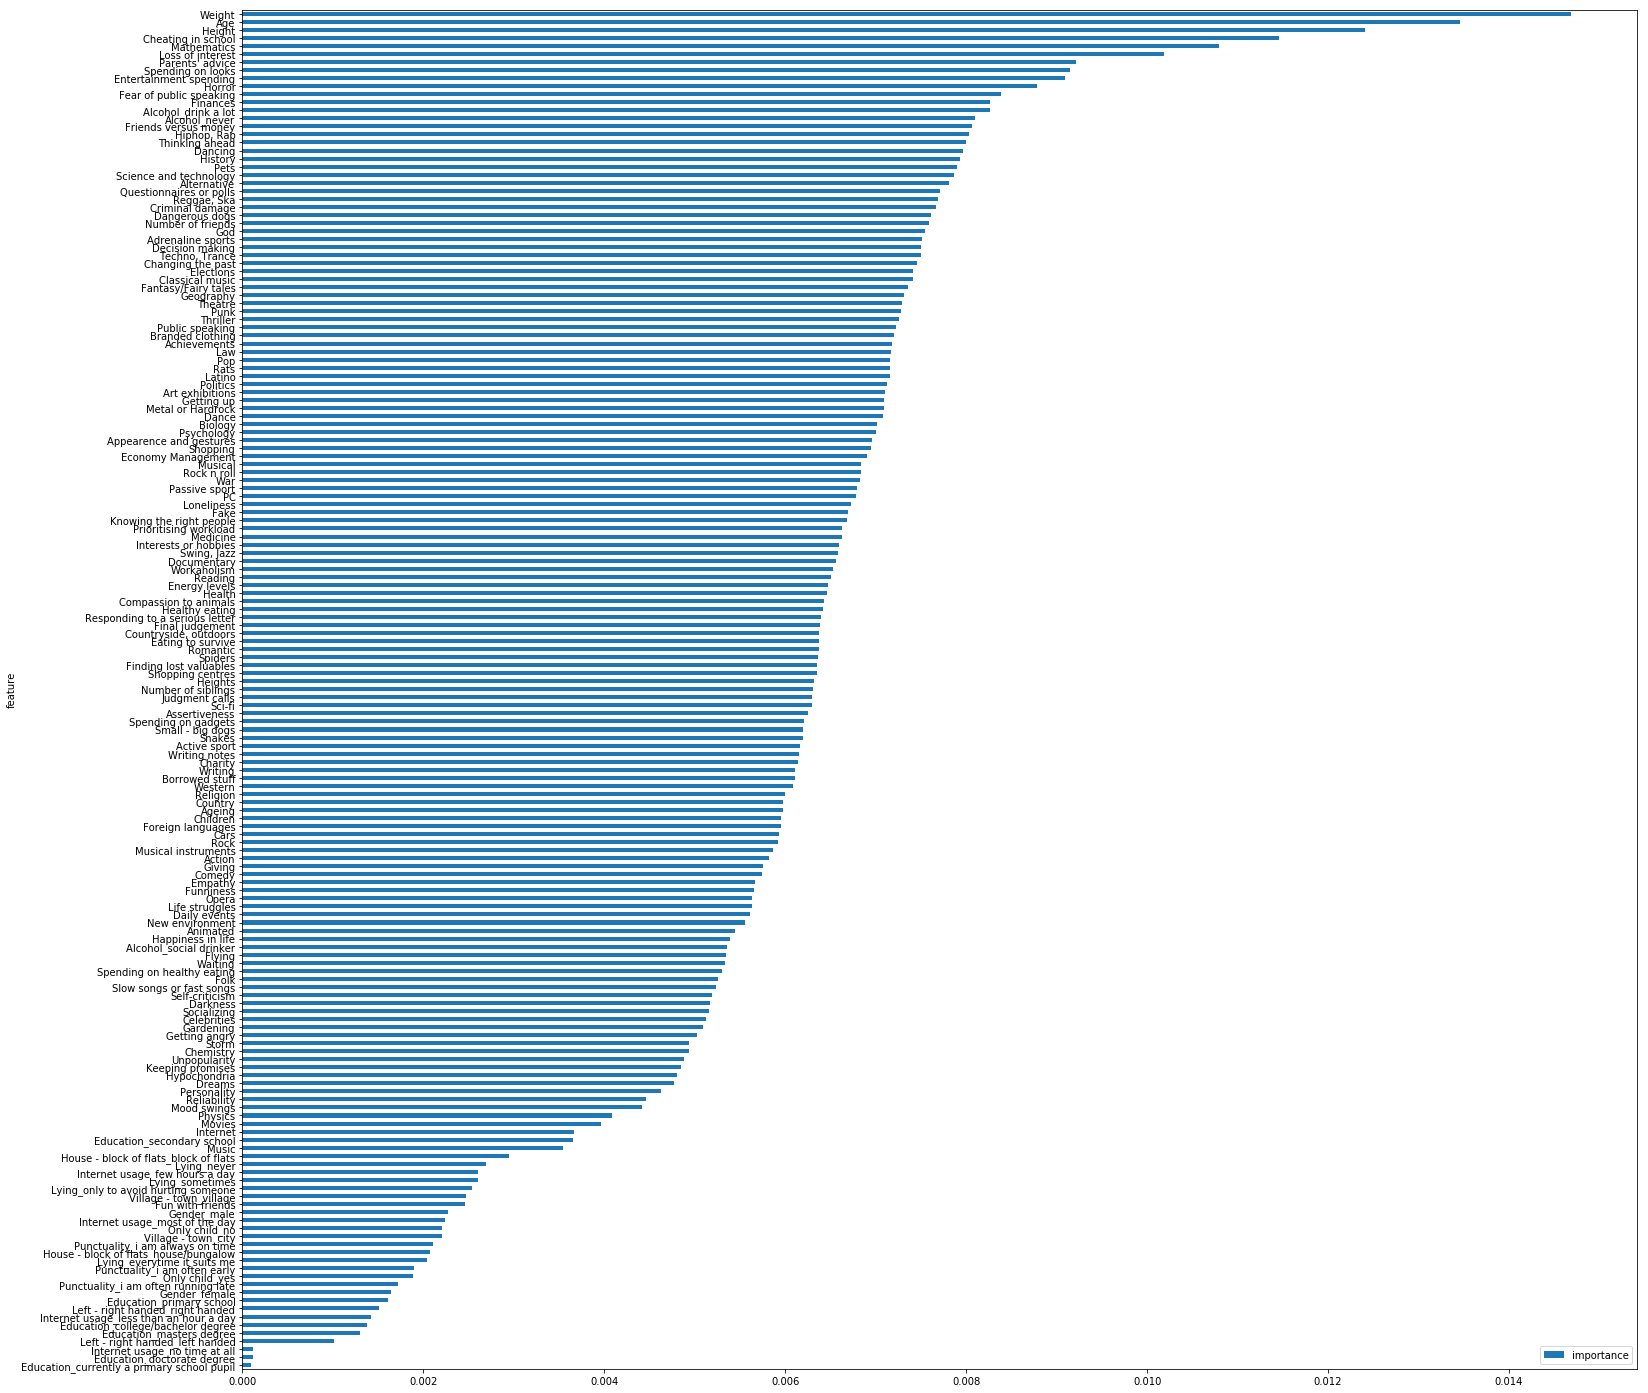

In [239]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X, y)

features = pd.DataFrame()
features['feature'] = X.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(25, 25))

<b>Dimensionality reduction</b>
<br>
In order to reduce the dimesions, the top most influential features are selected from the dataset.

In [240]:
from sklearn.feature_selection import SelectFromModel
print("Original shape:", X.shape)
model = SelectFromModel(clf, prefit=True)
X_reduced = model.transform(X)
print("New shape:", X_reduced.shape)

Original shape: (1002, 169)
New shape: (1002, 103)


<b>Splitting the data into train/dev/test data</b>

In [241]:
#X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state=4)
X1, X_test, y1, y_test = train_test_split(X, y, test_size = 0.15, random_state=4)

X_test_orig = X_test.copy()
y_test_orig = y_test.copy()
#persist test to csv
df = pd.DataFrame(X_test_orig)
df[target_col] = y_test_orig
df.to_csv("test_data.csv", index=False)

X_train, X_dev, y_train, y_dev = train_test_split(X1, y1, test_size = 0.15, random_state=1)

○ Building a logistic regression classifier works surprisingly better on the reduced dataset.

In [242]:
#Logistic regression
logreg = LogisticRegression(solver='sag', multi_class='multinomial')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Logistic Regression accuracy:", np.mean(y_test == y_pred))

Logistic Regression accuracy: 0.4900662251655629


○ Building a SVM classifier with RBF kernel with the reduced dataset works better than working on the original dataset.

In [243]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train) 
y_pred = svclassifier.predict(X_test)
print("SVM with RBF kernel accuracy:", np.mean(y_test == y_pred))

SVM with RBF kernel accuracy: 0.41721854304635764


<b>Principal Component Analysis</b>
<br>
Principal Component Analysis can be performed in order to reduce the dimesionality even further.
<br>
Here, the dataset will be reduced to 10 components. The difference is that instead of selecting the 10 most important features, the dataset will be transformed into a different dataset with only 10 components built from the original dataset.

In [244]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(n_components=10)
pca.fit(X_train)
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)

○ Logistic regression classifier achieves slightly better performance.

In [245]:
logisticRegr = LogisticRegression(solver = 'sag', multi_class='multinomial')
logisticRegr.fit(X_train2, y_train)
y_pred = logisticRegr.predict(X_test2)
print("Logistic Regression accuracy:", np.mean(y_test == y_pred))

Logistic Regression accuracy: 0.45695364238410596


○ SVM classifier performs slightly better.

In [246]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train2, y_train) 
y_pred = svclassifier.predict(X_test2)
print("SVM with RBF kernel accuracy:", np.mean(y_test == y_pred))

SVM with RBF kernel accuracy: 0.423841059602649


<b>Gradient Boosting classifier</b>
<br>
Finally, a gradient boosting classifier is trained to boost the performance. 

In [212]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 1, max_depth = 10, random_state = 0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print("Gradient boosting classifier accuracy:", np.mean(y_test == y_pred))

Gradient boosting classifier accuracy: 0.423841059602649


<b>Hyperparameter tuning</b>
<br>
Hyperparameter tuning is performed to select the best parameters for Gradient boosting classifier.
<br>
This is performed using the GridSearchCV module in sklearn.

In [213]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    "max_depth":[3,5,8],
    "n_estimators":[50]
    }

clf = GridSearchCV(gb, parameters, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy after grid search:", np.mean(y_test == y_pred))
print("Best parameter values after grid search:", clf.best_params_)

Accuracy after grid search: 0.40397350993377484
Best parameter values after grid search: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


<b>Results</b>
<br>
It can be seen that the Logistic regression model performs the best with multinomial distribution classification model.
<br>
The performance for each class can be estimated as shown below.
<br>
The precision values are lower for two classes. This can be attributed to lesser number of examples in the classes which can be handled using sampling of data.

In [214]:
from sklearn import model_selection, metrics
preds = model_selection.cross_val_predict(logreg, X_reduced, y, cv=10)
accScore = metrics.accuracy_score(y,preds)
labels = ["former smoker", "never smoked", "tried smoking", "current smoker"]
precision = metrics.precision_score(y,preds,average=None,labels=labels)
recall = metrics.recall_score(y,preds,average=None,labels=labels)
f1Score = metrics.f1_score(y,preds,average=None,labels=labels)
print("\nOverall Acurracy: ",accScore,"\n")
for i in range(len(labels)):
    print("Precision of %s class: %f" %(labels[i],precision[i]))
    print("Recall of %s class: %f" %(labels[i],recall[i]))
    print("F1-Score of %s class: %f" %(labels[i],f1Score[i]),"\n")


Overall Acurracy:  0.436127744510978 

Precision of former smoker class: 0.220779
Recall of former smoker class: 0.097143
F1-Score of former smoker class: 0.134921 

Precision of never smoked class: 0.472973
Recall of never smoked class: 0.336538
F1-Score of never smoked class: 0.393258 

Precision of tried smoking class: 0.468847
Recall of tried smoking class: 0.700000
F1-Score of tried smoking class: 0.561567 

Precision of current smoker class: 0.362963
Recall of current smoker class: 0.259259
F1-Score of current smoker class: 0.302469 



<b>Evaluation on the test set.</b>
<br>
Finally, the best performing classifier is used for prediction in the test set. An accuracy of 49% is achieved.

In [248]:
#Test set
data = pd.read_csv("test_data.csv", low_memory=False)
data_fin_copy = data.copy()
y = data_fin_copy[target_col]
data_fin_copy.drop([target_col], axis = 1, inplace = True)
X = data_fin_copy
X_reduced = model.transform(X)
y_pred = logreg.predict(X)
print("Logistic Regression classifier accuracy for test set:", np.mean(y == y_pred))

Logistic Regression classifier accuracy for test set: 0.4900662251655629
